## 데이터 출처: https://www.kaggle.com/datasets/telikaramu/worklife-balance-covid-19
## 데이터 주제: Work Life Balance of IT Employees during COVID-19
## 목표: 펜데믹 기간동안 IT 기업 직원들의 워라밸에 영향을 미치는 요인 알아보기

In [11]:
import pandas as pd

# 파일 경로
csv_file_path = "/Users/suran/Desktop/dataset.xlsx"  


df = pd.read_excel(csv_file_path)


# print(df.head())
print(df.shape)
print(df.columns)


(200, 21)
Index(['Gender:', ' Marital status?',
       ' If you are married, is your partner employed?',
       'Being employed, who helps you take care of your children?',
       ' How many hours in a day, do you spend time with your family during this Covid-19 Pandemic?',
       ' Do you ever miss out quality time with your family or your friends because of work?',
       'How many hours in a week do you work?',
       'do you feel that you are satisfied with your work life balance?',
       'Work life balance factors had a high impact on the  performance of employees in Hyderabad IT Industry during covid-19.',
       'Do you feel living in urban areas helps you maintain work life balance while working from home?',
       'Do you feel that time management plays an important role in maintian work life balance?',
       'Do you feel Flexible Work Schedule causes miscommunication between the employees?',
       'Do you feel that work from home adds to stress at home?',
       'Does work

## 1. 컬럼 모아보기
### 성별, 결혼 여부, 근무 시간, 워라밸 등 총 21개의 컬럼과 200개의 행이 존재했다. 
1. 'Gender:'
2. ' Marital status?'
3. ' If you are married, is your partner employed?'
4. 'Being employed, who helps you take care of your children?'
5. ' How many hours in a day, do you spend time with your family during this Covid-19 Pandemic?'
6. ' Do you ever miss out quality time with your family or your friends because of work?'
7. 'How many hours in a week do you work?'
8. 'do you feel that you are satisfied with your work life balance?',
9. 'Work life balance factors had a high impact on the  performance of employees in Hyderabad IT Industry during covid-19.'
10. 'Do you feel living in urban areas helps you maintain work life balance while working from home?'
11. 'Do you feel that time management plays an important role in maintian work life balance?'
12. 'Do you feel Flexible Work Schedule causes miscommunication between the employees?'
13. 'Do you feel that work from home adds to stress at home?'
14. 'Does work from home create a social gap between you and your colleagues?'
15. 'Do you feel that working hours have increased because of work from home?'
16. 'Organized work How do you Feel about Organized work effects on Work life balance factors Ex:-Because of the miscommunication between the employees and unable to Organized work? '
17. 'Do you feel that the amenities available at home are insufficient for a comfortable work experience?'
18. 'Do your family members hinder your work during work from home?'
19. 'How much do you rate yourself for financial balance in family during lockdown? '
20. 'How much do you rate yourself for psychological balance?'
21. 'How much do you rate yourself for Work Life Balance?'

### 특징
- 8~18번 컬럼은 문자열 데이터로, 'moderately Agree', 'Neutral', 'Strongly Disagree' 등의 **문자열 데이터**로 이뤄져있다.
- 19 ~ 21번 컬럼은 **정수형 데이터**로 이뤄져있다.

### 제외할 컬럼
- 1~7번은 수치형 데이터로 나타내기 애매한 컬럼(ex Gender, Marital status 등)이기 때문에 **제외하였다**. (일간, 주간 근무시간은 수치형 데이터로 나타낼 수 있지만 '3-4 hours'과 같이 대략적인 값으로 이뤄져있기 때문에 제외하였다.)
- 9번 컬럼은 워라밸이 업무 성과에 미치는 영향에 관한 항목이다. 본 분석과 인과 관계상 맞지 않으므로 **제외하였다**
- 10, 11번 컬럼은 '도시 생활 및 시간 관리가 워라밸에 영향을 미친다고 생각하는 정도'로, 독립변수가 될 컬럼에 워라벨과의 관계가 이미 들어가 있으므로 부적합하다고 판단되어 **제외하였다**
- 16번 컬럼은 질문의 내용이 어색하여 정확한 의도를 파악하기 어렵기 때문에 **제외하였다**.


### 다음 목표
- 문자열 데이터만 있는 컬럼과 정수형 데이터만 있는 컬럼에 대해 중복을 제거하여 존재하는 모든 값들을 확인해보기로 한다.

In [12]:
# 문자열 데이터만 있는 컬럼의 값 확인하기
for i in df.columns[7:18]:
    # 제외하기로 한 9번, 10, 11, 16번 컬럼은 건너뛰기
    if(i== 'Work life balance factors had a high impact on the  performance of employees in Hyderabad IT Industry during covid-19.' or 
       i=='Organized work How do you Feel about Organized work effects on Work life balance factors Ex:-Because of the miscommunication between the employees and unable to Organized work? ' or
        i == 'Do you feel living in urban areas helps you maintain work life balance while working from home?' or
    i=='Do you feel that time management plays an important role in maintian work life balance?'):
        continue
    test = df[i].unique().tolist()
    test = sorted(test) # 오름차순으로 정렬
    print(test) 
    
# 정수형 데이터만 있는 컬럼의 값 확인하기
for i in df.columns[18:21]:
    test = df[i].unique().tolist()
    test = sorted(test) # 오름차순으로 정렬
    print(test) 

['Agree', 'Disagree', 'Moderately Disagree', 'Neutral', 'Strongly Agree', 'Strongly Disagree', 'moderately Agree']
['Agree', 'Disagree', 'Moderately Disagree', 'Neutral', 'Strongly Agree', 'Strongly Disagree', 'moderately Agree']
['Agree', 'Disagree', 'Moderately Disagree', 'Neutral', 'Strongly Agree', 'Strongly Disagree', 'moderately Agree']
['Agree', 'Disagree', 'Moderately Disagree', 'Neutral', 'Strongly Agree', 'Strongly Disagree', 'moderately Agree']
['Agree', 'Disagree', 'Moderately Disagree', 'Neutral', 'Strongly Agree', 'Strongly Disagree', 'moderately Agree']
['Agree', 'Disagree', 'Moderately Disagree', 'Neutral', 'Strongly Agree', 'Strongly Disagree', 'moderately Agree']
['Agree', 'Disagree', 'Moderately Disagree', 'Neutral', 'Strongly Agree', 'Strongly Disagree', 'moderately Agree']
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]


## 2. 컬럼의 값 분석하기
### 문자열 데이터만 있는 컬럼
- 'Agree', 'Disagree', 'Moderately Disagree', 'Neutral', 'Strongly Agree', 'Strongly Disagree', 'moderately Agree' 총 7개의 데이터가 존재한다.
- 모든 컬럼에 위 7개의 값이 동일하게 존재한다.
- 결측치는 없다.

### 정수형 데이터만 있는 컬럼
- 1부터 5까지 총 5개의 데이터가 존재한다.
- 모든 컬럼에 1~5의 값이 동일하게 존재한다.
- 결측치는 없다.

### 결론
- 문자열 데이터는 정도를 나타내고 있고, 이상치나 결측치가 없기 때문에 1~7까지의 수치형 데이터로 형변환 가능하다.
'Strongly Agree': 7,
'Agree': 6,
'moderately Agree': 5,
'Neutral': 4,
'Moderately Disagree': 3,
'Disagree': 2,
'Strongly Disagree': 1
- 1-5 보다는 1-7의 값이 더 다양성이 있다고 판단했기 때문에, 통일성을 위해 정수형 데이터의 컬럼은 사용하지 않고, **문자열 데이터만 있는 컬럼(9번, 10, 11, 16번 컬럼 제외)**만 분석에 사용하기로 한다.

### 다음단계
- 컬럼 명이 너무 길기 때문에 단순화시키고, 필요없는 컬럼은 제외한다.
    - 'do you feel that you are satisfied with your work life balance?' -> <span style="color:blue">workLifeBalance</span>
    - 'Do you feel Flexible Work Schedule causes miscommunication between the employees?' -> <span style="color:blue">missCommunicationCausedByFlexibleWork</span>
    - 'Do you feel that work from home adds to stress at home?' -> <span style="color:blue">stressAtHome</span>
    - 'Does work from home create a social gap between you and your colleagues?' -> <span style="color:blue">socialGap</span>
    - 'Do you feel that working hours have increased because of work from home?' -> <span style="color:blue">increasedWorkingHours</span>
    - 'Do you feel that the amenities available at home are insufficient for a comfortable work experience?' -> <span style="color:blue">amenitiesInsufficient</span>
    - 'Do your family members hinder your work during work from home?' -> <span style="color:blue">familyHindrance</span>
- 문자열 데이터를 1-7의 수치형 데이터로 형변환한다.

In [13]:
# 컬럼명이 너무 길어서 짧게 변경
df = df.rename(columns={'do you feel that you are satisfied with your work life balance?': 'workLifeBalance'})
df = df.rename(columns={'Do you feel Flexible Work Schedule causes miscommunication between the employees?': 'missCommunicationCausedByFlexibleWork'})
df = df.rename(columns={'Do you feel that work from home adds to stress at home?': 'stressAtHome'})
df = df.rename(columns={'Does work from home create a social gap between you and your colleagues?': 'socialGap'})
df = df.rename(columns={'Do you feel that working hours have increased because of work from home?': 'increasedWorkingHours'})
df = df.rename(columns={'Do you feel that the amenities available at home are insufficient for a comfortable work experience?': 'amenitiesInsufficient'})
df = df.rename(columns={'Do your family members hinder your work during work from home?': 'familyHindrance'})


# 문자열 -> 정수로 바꾸기 위한 dictionary 객체 생성
mapping_dict = {
    'Strongly Agree': 7,
    'Agree': 6,
    'moderately Agree': 5,
    'Neutral': 4,
    'Moderately Disagree': 3,
    'Disagree': 2,
    'Strongly Disagree': 1
}


# mapping_dict을 바탕으로 실제 컬럼의 값을 변환
for i in df.columns[7:18]:
    # 제외하기로 한 9번, 10, 11, 16번 컬럼은 건너뛰기
    if(i== 'Work life balance factors had a high impact on the  performance of employees in Hyderabad IT Industry during covid-19.' or 
       i=='Organized work How do you Feel about Organized work effects on Work life balance factors Ex:-Because of the miscommunication between the employees and unable to Organized work? ' or
        i == 'Do you feel living in urban areas helps you maintain work life balance while working from home?' or
    i=='Do you feel that time management plays an important role in maintian work life balance?'):
        continue
    df[i] = df[i].replace(mapping_dict)
                        
# 필요한 컬럼만 추출해서 새로운 df 객체 생성
new_df = df[['workLifeBalance','missCommunicationCausedByFlexibleWork','stressAtHome','socialGap', 'increasedWorkingHours','amenitiesInsufficient','familyHindrance']]

# 결과 확인
print(new_df.head)


<bound method NDFrame.head of      workLifeBalance  missCommunicationCausedByFlexibleWork  stressAtHome  \
0                  5                                      7             7   
1                  5                                      7             2   
2                  4                                      7             1   
3                  1                                      5             6   
4                  3                                      4             4   
..               ...                                    ...           ...   
195                7                                      3             2   
196                6                                      5             6   
197                2                                      2             2   
198                7                                      4             4   
199                7                                      7             7   

     socialGap  increasedWorkingHours  amenit

## 3. 독립변수와 종속변수 설정 및 가설 세우기
### 독립변수(6개)

'missCommunicationCausedByFlexibleWork','stressAtHome','socialGap', 'increasedWorkingHours','amenitiesInsufficient','familyHindrance'

### 종속변수
'workLifeBalance', 

### 가설 설정
1. 유연 근무제가 직원간 의사소통에 문제가 된다고 생각하는 정도
2. 재택근무가 집에서의 스트레스를 가중시킨다고 생각하는 정도
3. 재택근무가 직원간 사회적 격차를 발생시킨다고 생각하는 정도
4. 재택근무로 인해 근로시간이 증가했다고 생각하는 정도
5. 집에서의 편의 시설이 편안한 직장 생활을 하기에 부족하다고 생각하는 정도
6. 가족들이 재택근무 중 업무에 지장을 준다고 생각하는 정도

**위 6가지 독립변수는 IT 직원들의 워라밸과 관계가 있다.**

### 구체적인 대립 가설 설정

1. 유연 근무제가 직원간 의사소통에 문제가 된다고 생각하는 정도가 작을 수록 워라벨이 높을 것이다.
2. 재택근무가 집에서의 스트레스를 가중시킨다고 생각하는 정도가 작을 수록 워라벨이 높을 것이다.
3. 재택근무가 직원간 사회적 격차를 발생시킨다고 생각하는 정도가 작을 수록 워라벨이 높을 것이다.
4. 재택근무로 인해 근로시간이 증가했다고 생각하는 정도가 작을 수록 워라벨이 높을 것이다.
5. 집에서의 편의 시설이 편안한 직장 생활을 하기에 부족하다고 생각하는 정도가 작을 수록 워라벨이 높을 것이다.
6. 가족들이 재택근무 중 업무에 지장을 준다고 생각하는 정도가 작을 수록 워라벨이 높을 것이다.


### 다음 단계
- ols를 이용한 다중 회귀 분석

In [17]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

lm_workLifeBal = smf.ols("workLifeBalance ~ missCommunicationCausedByFlexibleWork + stressAtHome +  socialGap + increasedWorkingHours + amenitiesInsufficient + familyHindrance", data = new_df).fit()

#추정된 결과
print(lm_workLifeBal.summary())

                            OLS Regression Results                            
Dep. Variable:        workLifeBalance   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     14.01
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           3.27e-13
Time:                        22:31:48   Log-Likelihood:                -381.24
No. Observations:                 200   AIC:                             776.5
Df Residuals:                     193   BIC:                             799.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [18]:
lm_workLifeBal = smf.ols("workLifeBalance ~ missCommunicationCausedByFlexibleWork + familyHindrance", data = new_df).fit()

#추정된 결과
print(lm_workLifeBal.summary())

                            OLS Regression Results                            
Dep. Variable:        workLifeBalance   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     39.59
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           3.54e-15
Time:                        22:32:12   Log-Likelihood:                -383.61
No. Observations:                 200   AIC:                             773.2
Df Residuals:                     197   BIC:                             783.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

## 4. 다중 회귀 결과 분석

### p-value
먼저 summary() 함수를 통해 p-value를 확인했을 때, 값이 p < 0.05인 독립변수로는 missCommunicationCausedByFlexibleWork,familyHindrance다. 따라서 통계적 유의성을 갖는 2가지 항목에 대해 다시 다중 회귀 분석을 실시한다.
그 결과 여전히 두 변수 모두 p < 0.05 이하임을 확인할 수 있다.

### R-squared
결정 계수는 0.286으로, 30% 미만의 높지않은 설명력을 가진 것으로 파악되었다.

### coef
missCommunicationCausedByFlexibleWork,familyHindrance 각각의 회귀계수는 0.2307, 0.3338로, 상대적으로 familyHindrance의 영향력이 더 크다.

### 다음단계
시각화

## 5. 시각화
회귀계수 값이 더 큰 familyHindrance의 기울기가 약간 더 큰 것을 확인할 수 있다.

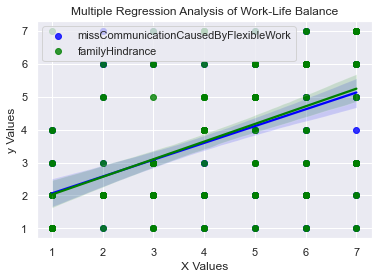

In [130]:
#선형모델을 추정하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

#표시 자릿수 지정
%precision 3

#그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline


# Seaborn을 사용한 회귀선 시각화 (p < 0.05인 변수들만)
sns.regplot(x='missCommunicationCausedByFlexibleWork', y='workLifeBalance', data=new_df, label='missCommunicationCausedByFlexibleWork', color='blue')
sns.regplot(x='familyHindrance', y='workLifeBalance', data=new_df, label='familyHindrance', color='green')

# 그래프 라벨 및 제목 설정
plt.xlabel('X Values')
plt.ylabel('y Values')
plt.title('Multiple Regression Analysis of Work-Life Balance')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

## 6. 결과 해석
'유연 근무제가 직원간 의사소통에 문제가 된다고 생각하는 정도가 클수록', '가족들이 재택근무 중 업무에 지장을 준다고 생각하는 정도가 클수록' 워라밸 수준이 낮다고 응답할 것이라고 생각했다. 그런데 둘의 회귀계수가 음수가 아닌 양수값이 나왔다는 점이 주목할 만하다. 

### 이유 추측
- missCommunicationCausedByFlexibleWork: 이유를 추측할 수 없음. p-value도 0.05에 근접하게 나와서 의미 없는 독립변수로 판단.
- familyHindrance가 높다는 것은 그만큼 가족과 보내는 시간이 많다고 볼 수 있음. 가족의 업무 방해가 업무 성과와는 관계가 있을지 몰라도, 가족과 보내는 시간이 많아지기 때문에 워라밸에는 오히려 긍정적일 수도 있음
- 해당 모델이 회귀분석의 4가지 가정을 충족하는지 검증하지 못함

## 7. 추가 분석
 ## 독립 변수로 채택하지 않았던 컬럼 중 유의미해 보이는 2가지 컬럼에 대해 분석 및 시각화
 ### 2개의 컬럼명을 간결히 바꾸고 새로운 df 객체로 재구성하고 응답 빈도를 시각화
 
 - 'Work life balance factors had a high impact on the  performance of employees in Hyderabad IT Industry during covid-19.' -> <span style="color:blue">WLBwithJobPerformance</span>
 - 'Do you feel that time management plays an important role in maintian work life balance?' -> <span style="color:blue">timeManagement</span>

In [145]:
df = df.rename(columns={'Work life balance factors had a high impact on the  performance of employees in Hyderabad IT Industry during covid-19.': 'WLBwithJobPerformance'})
df = df.rename(columns={'Do you feel that time management plays an important role in maintian work life balance?': 'timeManagement'})


additional_df = df[['WLBwithJobPerformance','timeManagement']]

print(additional_df)

    WLBwithJobPerformance  timeManagement
0     Moderately Disagree           Agree
1     Moderately Disagree        Disagree
2                Disagree        Disagree
3       Strongly Disagree           Agree
4                 Neutral         Neutral
..                    ...             ...
195              Disagree        Disagree
196      moderately Agree           Agree
197              Disagree        Disagree
198               Neutral         Neutral
199        Strongly Agree  Strongly Agree

[200 rows x 2 columns]


## WLBwithJobPerformance에 대한 응답 빈도를 시각화

### 결과
펜데믹 동안 워라밸이 업무 성과에 큰 영향을 미쳤다는 질문에 50% 이상의 직원들이 동의했다. 35%의 직원들은 동의하지 않았다.

Agree                  37
moderately Agree       37
Strongly Agree         35
Moderately Disagree    28
Disagree               24
Neutral                21
Strongly Disagree      18
Name: WLBwithJobPerformance, dtype: int64


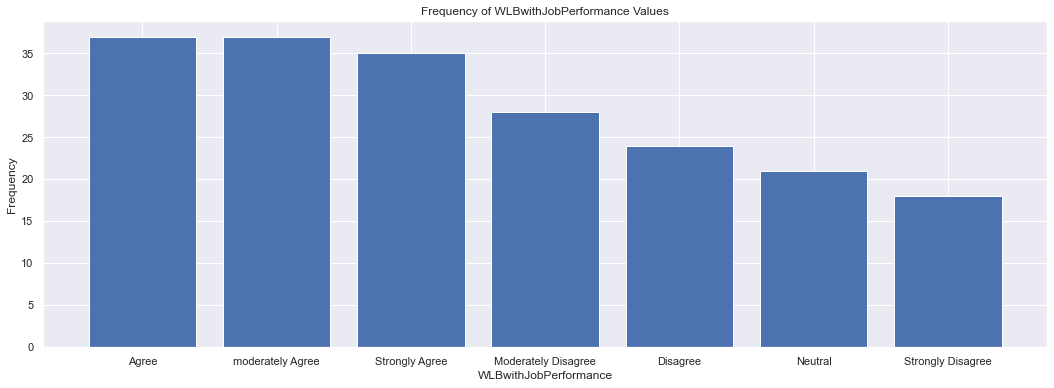

In [142]:
count = additional_df['WLBwithJobPerformance'].value_counts()
print(count)

plt.figure(figsize=(18, 6))
plt.bar(count.index, count.values)

# 그래프 레이블과 제목 설정
plt.xlabel('WLBwithJobPerformance')
plt.ylabel('Frequency')
plt.title('Frequency of WLBwithJobPerformance Values')

# 그래프 표시
plt.show()

## timeManagement에 대한 응답 빈도를 시각화

### 결과
시간 관리가 워라밸을 유지하는데 중요한 역할을 한다는 질문에 대해 약 60%의 직원들이 동의했다. 32%의 직원들은 동의하지 않았다.

Strongly Agree         45
Agree                  42
moderately Agree       34
Moderately Disagree    25
Disagree               22
Strongly Disagree      17
Neutral                15
Name: timeManagement, dtype: int64


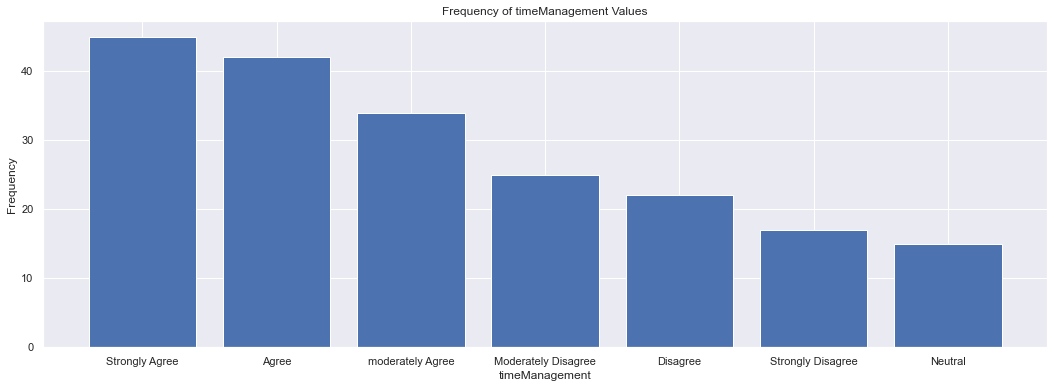

In [147]:
count = additional_df['timeManagement'].value_counts()
print(count)

plt.figure(figsize=(18, 6))
plt.bar(count.index, count.values)

# 그래프 레이블과 제목 설정
plt.xlabel('timeManagement')
plt.ylabel('Frequency')
plt.title('Frequency of timeManagement Values')

# 그래프 표시
plt.show()

## 8. 결론
1. 펜데믹 기간동안 IT 기업 직원들의 워라밸에 영향을 미치는 요인을 알아보기 위해 데이터 수집 및 정제를 진행하였다. 
2. 'missCommunicationCausedByFlexibleWork','stressAtHome','socialGap', 'increasedWorkingHours','amenitiesInsufficient','familyHindrance' 6가지 독립변수와 종속변수('workLifeBalance')를 설정하고, **"6가지 독립변수는 IT 직원들의 워라밸과 관계가 있다."** 는 가설을 검정하기 위해 다중 회귀분석을 진행하였다.
3. 그 결과 통계적 유의성(p<0.05)을 가지는 독립변수는 'missCommunicationCausedByFlexibleWork', familyHindrance'이며, 두 독립변수에 대해 다중회귀 분석을 재실시하였다.
    - p-value는 0.05 이하를 유지하고 있었다.
    - 결정 계수는 0.286으로, 30% 미만의 높지않은 설명력을 가졌다.
    - 회귀 계수의 절댓값은 familyHindrance가 더 크다. 따라서 종속변수에 대한 영향력도 상대적으로 더 크다.
4. 분석 결과 해석 과정에서 'missCommunicationCausedByFlexibleWork', familyHindrance' 두 독립변수의 회귀 계수 값이 음수가 나올 것으로 기대했으나 양수가 나와서 이유를 추측해보았다.
    - missCommunicationCausedByFlexibleWork: 이유를 추측할 수 없음. p-value도 0.05에 근접하게 나와서 의미 없는 독립변수로 판단.
    - familyHindrance가 높다는 것은 그만큼 가족과 보내는 시간이 많다고 볼 수 있음. 가족의 업무 방해가 업무 성과와는 관계가 있을지 몰라도, 가족과 보내는 시간이 많아지기 때문에 워라밸에는 오히려 긍정적일 수도 있음
5. **본 분석의 한계점**
    - 해당 모델이 회귀분석의 4가지 가정(선형, 다중공선성, 잔차의정규성, 잔차의 등분산)을 충족했는지 검증하지 못하였다.
    - 표본의 크기가 200으로 크지 않았다.
    - 위와 같은 이유로 분석 결과 중 납득하기 힘든 부분이 있다고 판단해서 결론 보충을 위해 추가 분석을 진행하였다.
6. 추가 분석으로는 다중 회귀 분석 시 독립변수에 포함하지 않았던 'WLBwithJobPerformance','timeManagement'에 대해 직원들의 응답 빈도를 확인하고 시각화 하는 작업을 진행하였다.
    - 시간 관리가 워라밸을 유지하는데 중요한 역할을 한다는 질문에 대해 약 60%의 직원들이 동의했다
    - 펜데믹 동안 워라밸이 업무 성과에 큰 영향을 미쳤다는 질문에 50% 이상의 직원들이 동의했다. 
    
## 9. 해당 IT 기업 경영진에게 제안하는 사항
1. 재택근무로 가족과 보내는 시간이 많아지면, 직원들의 워라밸 수준이 향상될 수 있다. 하지만 가족들의 업무 방해로 인한 직무 성과와는 관계가 없는지 검증이 필요하다.
2. 직원들의 60%가 시간관리가 워라밸에 중요한 역할을 한다고 응답했다. 따라서 재택근무 시 직원들의 시간관리를 위한 매뉴얼 제공, 시간 관리 모니터링 프로그램 등을 제공하는 것은 직원 워라밸 향상에 도움이 될 수 있다.
3. 절반 이상의 직원들이 워라밸은 업무 성과와 긍정적인 관계가 있다고 응답했다. 따라서 직원들이 워라밸을 추구할 수 있도록 방안을 모색해야 한다.